
### Visualizing Statistical Concepts
To make these ideas more concrete, we will use visualizations. For instance, we will demonstrate:
- How data is distributed with standard deviations.
- The role of standard error in summarizing sample mean variation.
- The bootstrapping process and its results.

Let's dive in!


# The Standard Error, Clearly Explained

The Standard Error is a measure of how much we expect the means from many different samples to vary from one sample to another. It is a concept derived from statistics used to quantify the amount of variation or dispersion of a set of values.

In this notebook, we will discuss Standard Error, its calculation and its applications in detail. We will also explore a technique called bootstrapping which is used when there is no direct formula to calculate the Standard Error.

## Understanding Standard Error

Consider you have collected measurements from three samples labeled A, B, and C. You calculate the means for these three datasets and then calculate the standard deviations.

Now, there are three common types of error bars:

1. **Standard Deviations:** This tells us how the data are distributed around the mean. Large standard deviations tell us that some of the data points were pretty far from the mean. 
2. **Standard Errors:** This tells us how the mean is distributed. 
3. **Confidence Intervals:** These are related to standard errors. They give us a range of values which is likely to contain the population parameter.

The focus of this notebook is Standard Errors.

## Calculating Standard Error

Consider a normal distribution where you have measured the weight of a lot of mice and plotted the distribution of differences from the mean. Most of the mice had weights close to the average, a few of the mice weighed much less than the average mouse and a few other mice weighed much more than the average.

Usually, you can't afford to measure the weight of all the mice so you just take a sample. Since most of the mice have weight close to the average, most of our samples are going to be close to zero.

The standard deviation of the mean is called the Standard Error of the Mean (SE). The standard error gives us a sense of how much variation we can expect in our means if we took a bunch of independent measurements.

The steps to calculate the Standard Error of the Mean are as follows:

1. **Take a bunch of samples** each with the same number of measurements or n. In this case, n equals 5.
2. **Calculate the mean for each sample.**
3. **Calculate the standard deviation of the means.** In this case, the standard error equals 0.86

## Bootstrapping

In rare cases, there's a formula you can use to estimate the Standard Error of the Mean. The formula is very simple, it's just the standard deviation divided by the square root of the sample size. However, there aren't many other cases. The good news again is that we can use something called bootstrapping for everything else. Bootstrapping is very simple conceptually and it's easy to make a computer do this work.

The steps to perform bootstrapping are as follows:

1. **Pick a random measurement** from the sample that we just took.
2. **Write that value down.**
3. **Go back to step 1** and pick a new random measurement and write that value down.
4. **Calculate the statistic** (mean, median, mode etc.) that we're interested in understanding the Standard Error of.
5. **Go back to the beginning and repeat** until you have a lot of means (or medians or modes etc.)
6. **Calculate the standard deviation** of all the means (or medians or modes etc.)

In this case, we calculated the standard error of the mean and we've plotted it as a black line in the graph. So if there's no fancy formula to help us calculate the Standard Error, we can do it ourselves from scratch. We can just use bootstrap and get the job done.

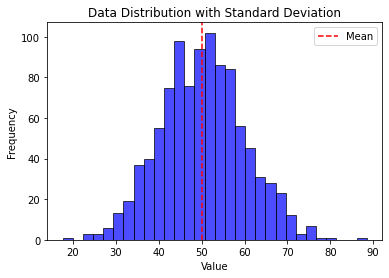

In [1]:

import numpy as np
import matplotlib.pyplot as plt

# Generate data to visualize standard deviation
np.random.seed(42)
data = np.random.normal(loc=50, scale=10, size=1000)

# Plot histogram
plt.hist(data, bins=30, alpha=0.7, color='blue', edgecolor='black')
plt.axvline(np.mean(data), color='red', linestyle='--', label='Mean')
plt.title("Data Distribution with Standard Deviation")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.legend()
plt.show()


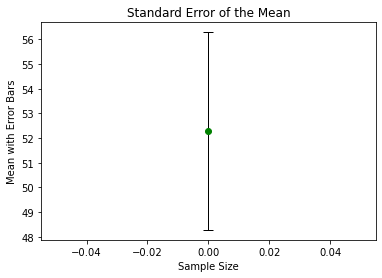

In [31]:
sample_size = 5
sample_bts = np.random.choice(data, size=sample_size, replace=True) # samples bootstrapped
means = np.mean(sample_bts)
errors = np.std( sample_bts ) / np.sqrt(sample_size)

plt.errorbar(0, means, yerr=errors, fmt='o', capsize=5, color='green', ecolor='black', elinewidth=1)
plt.title("Standard Error of the Mean")
plt.xlabel("Sample Size")
plt.ylabel("Mean with Error Bars")
plt.show()


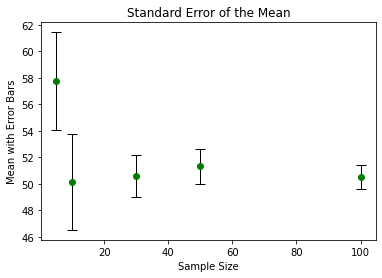

In [30]:

# Simulate sample means to visualize standard error
sample_sizes = [5, 10, 30, 50, 100]
means = [np.mean(np.random.choice(data, size=n, replace=True)) for n in sample_sizes]

# Plot standard error as a function of sample size
errors = [np.std(np.random.choice(data, size=n, replace=True)) / np.sqrt(n) for n in sample_sizes]
plt.errorbar(sample_sizes, means, yerr=errors, fmt='o', capsize=5, color='green', ecolor='black', elinewidth=1)
plt.title("Standard Error of the Mean")
plt.xlabel("Sample Size")
plt.ylabel("Mean with Error Bars")
plt.show()

In [50]:
# Bootstrapping demonstration
bootstrap_samples = 1000

mean_small_sampleS = []
for iter in range(1000):
    small_sample = np.random.choice(data, size=50, replace=True)
    mean_small_sample = np.mean(small_sample)
    mean_small_sampleS.append(mean_small_sample)

np.std(mean_small_sampleS)

1.4091164422122715

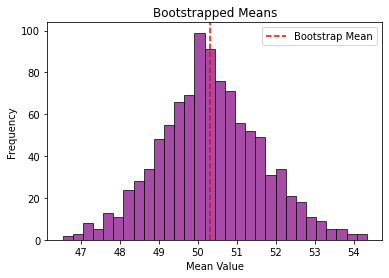

In [3]:

# Bootstrapping demonstration
bootstrap_samples = 1000
bootstrap_means = [np.mean(np.random.choice(data, size=50, replace=True)) for _ in range(bootstrap_samples)]

# Plot bootstrapped means
plt.hist(bootstrap_means, bins=30, alpha=0.7, color='purple', edgecolor='black')
plt.axvline(np.mean(bootstrap_means), color='red', linestyle='--', label='Bootstrap Mean')
plt.title("Bootstrapped Means")
plt.xlabel("Mean Value")
plt.ylabel("Frequency")
plt.legend()
plt.show()



### Conclusion
Through these visuals, we've seen:
1. How data is distributed and its relationship with standard deviation.
2. The concept of standard error and how it quantifies variability in sample means.
3. The power of bootstrapping for estimating the standard error in cases without direct formulas.

Feel free to tweak the parameters or add your datasets to explore further!
